In [2]:
import pandas as pd
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt

In [6]:
def format_min_max(group):
    min_rmse, max_rmse = round(group['rmse'].min(), 2), round(group['rmse'].max(), 2)
    min_r2, max_r2 = round(group['r2'].min(), 2), round(group['r2'].max(), 2)
    return pd.Series({
        'rmse range': f"{min_rmse} - {max_rmse}",
        'r2 range': f"{min_r2} - {max_r2}"
    })

pd.concat([pd.read_csv("../../ml_data/fitted_models/metrics_ridge.csv").agg({
    'rmse': ['min', 'max'],
    'r2': ['min', 'max']
    }).assign(regularization = "ridge", cut = "8020"),
pd.read_csv("../../ml_data/fitted_models/metrics_lasso.csv").agg({
    'rmse': ['min', 'max'],
    'r2': ['min', 'max']
    }).assign(regularization = "lasso", cut = "8020") ,
pd.read_csv("../../ml_data/fitted_models/metrics_elastic.csv").agg({
    'rmse': ['min', 'max'],
    'r2': ['min', 'max']
    }).assign(regularization = "elastic", cut = "8020") ,
pd.read_csv("../../ml_data/fitted_models/all_metrics_elastic_year.csv").agg({
    'rmse': ['min', 'max'],
    'r2': ['min', 'max']
    }).assign(regularization = "elastic", cut = "TZ") ,
pd.read_csv("../../ml_data/fitted_models/all_metrics_lasso_year.csv").agg({
    'rmse': ['min', 'max'],
    'r2': ['min', 'max']
    }).assign(regularization = "lasso", cut = "TZ"), 
pd.read_csv("../../ml_data/fitted_models/all_metrics_ridge_year.csv").agg({
    'rmse': ['min', 'max'],
    'r2': ['min', 'max']
    }).assign(regularization = "ridge", cut = "TZ") ]).groupby(['regularization', 'cut'])\
          .apply(format_min_max)\
          .reset_index().sort_values(["cut", "regularization"])




,regularization,cut,rmse range,r2 range
0,elastic,8020,385.86 - 2694.89,-0.41 - 0.99
2,lasso,8020,385.86 - 2628.81,-0.53 - 0.99
4,ridge,8020,389.54 - 2698.6,-0.35 - 0.99
1,elastic,TZ,730.69 - 14537.16,-36.51 - 0.78
3,lasso,TZ,746.43 - 15395.67,-36.08 - 0.77
5,ridge,TZ,794.63 - 14573.73,-52.87 - 0.77


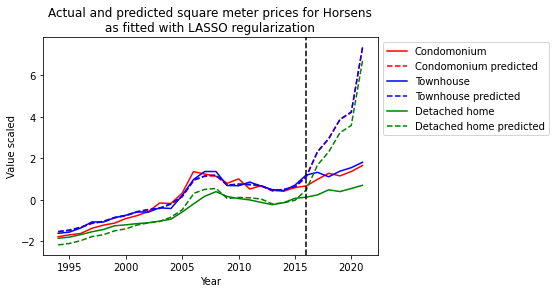

In [9]:
data = pd.read_csv("../../ml_data/fitted_models/all_pred_lasso_year.csv") 

df = data.query("muni_code == 615").copy() 

# Prediction - “tidsserierne” . Plots på udvalgte kommuner 

ejerlejlighed_df = df[df['housing_type'] == 'Ejerlejlighed'] 
rækkehus_df = df[df['housing_type'] == 'Rækkehus'] 
villa_df = df[df['housing_type'] == 'Villa'] 

  

# Lav plot for Ejerlejlighed 

plt.plot(ejerlejlighed_df['year'], ejerlejlighed_df['y'], label='Condomonium', linestyle='-', color = "red") 
plt.plot(ejerlejlighed_df['year'], ejerlejlighed_df['y_pred'], label='Condomonium predicted', linestyle='--', color = "red") 

  

# Lav plot for Rækkehus 
plt.plot(rækkehus_df['year'], rækkehus_df['y'], label='Townhouse', linestyle='-', color = "blue") 
plt.plot(rækkehus_df['year'], rækkehus_df['y_pred'], label='Townhouse predicted', linestyle='--', color = "blue") 

  

# Lav plot for Villa 
plt.plot(villa_df['year'], villa_df['y'], label='Detached home', linestyle='-', color = "green") 

plt.plot(villa_df['year'], villa_df['y_pred'], label='Detached home predicted', linestyle='--', color = "green") 

  

# Tilføj labels og titel 

plt.xlabel('Year') 

plt.ylabel('Value scaled') 

plt.title('Actual and predicted square meter prices for Horsens\n as fitted with LASSO regularization ') 
plt.legend(loc="upper left", bbox_to_anchor=(1,1)) 

plt.axvline(x=2016, color='black', linestyle='--')

plt.savefig('horsens-yearly.png', bbox_inches='tight')
plt.show() 



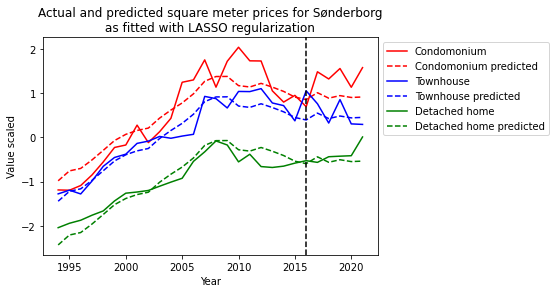

In [11]:
data = pd.read_csv("../../ml_data/fitted_models/all_pred_lasso_year.csv") 

df = data.query("muni_code == 540").copy() 

# Prediction - “tidsserierne” . Plots på udvalgte kommuner 

ejerlejlighed_df = df[df['housing_type'] == 'Ejerlejlighed'] 
rækkehus_df = df[df['housing_type'] == 'Rækkehus'] 
villa_df = df[df['housing_type'] == 'Villa'] 

  

# Lav plot for Ejerlejlighed 

plt.plot(ejerlejlighed_df['year'], ejerlejlighed_df['y'], label='Condomonium', linestyle='-', color = "red") 
plt.plot(ejerlejlighed_df['year'], ejerlejlighed_df['y_pred'], label='Condomonium predicted', linestyle='--', color = "red") 

  

# Lav plot for Rækkehus 
plt.plot(rækkehus_df['year'], rækkehus_df['y'], label='Townhouse', linestyle='-', color = "blue") 
plt.plot(rækkehus_df['year'], rækkehus_df['y_pred'], label='Townhouse predicted', linestyle='--', color = "blue") 

  

# Lav plot for Villa 
plt.plot(villa_df['year'], villa_df['y'], label='Detached home', linestyle='-', color = "green") 

plt.plot(villa_df['year'], villa_df['y_pred'], label='Detached home predicted', linestyle='--', color = "green") 

  

# Tilføj labels og titel 

plt.xlabel('Year') 

plt.ylabel('Value scaled') 

plt.title('Actual and predicted square meter prices for Sønderborg\n as fitted with LASSO regularization ') 
plt.legend(loc="upper left", bbox_to_anchor=(1,1)) 

plt.axvline(x=2016, color='black', linestyle='--')

plt.savefig('sønderborg-yearly.png', bbox_inches='tight')
plt.show() 
